In [1]:
import os
currentdir=os.getcwd()
os.chdir(currentdir)

\begin{eqnarray}
\frac{P}{T^4} &=& \frac{1}{2}[1- f(T,\mu_J)] \frac{P_{\mathrm{had}}(T,\mu_J)}{T^4} \nonumber \\
&+& \frac{1}{2}[1+ f(T,\mu_J)] \frac{P_{\mathrm{lat}}(T_s,\mu_J)}{T_s^4} 
\end{eqnarray}

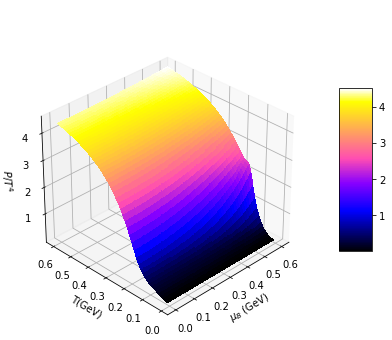

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.special import kv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import besselk
from sympy import lambdify
from sympy import exp,besselk,expand_func 
from scipy import interpolate
from scipy.interpolate import interp1d

mub=Symbol('mub')
muq=Symbol('muq')
mus=Symbol('mus')
T=Symbol('T')

bessel = {'besselk':kv}
libraries = [bessel, 'numpy']

def hrg(mub,muq,mus,T):
    d=pd.read_csv('particle_data.csv')
    pi=np.pi
    lines=[]
    lines.append(d.columns[0].split())
    for i in range(len(d)):
        lines.append(d['Name\t       Mass\t   Gamma\t    Spin    Isospin  I3      B\t\tstrange\t\tcharge'][i].split())
    k , v= lines[0],lines[1:]
    dict={k:v for k,v in zip(k,zip(*v))}
    def whichtype(x):
        if (x-int(x)) !=0:
            return -1
        else:
            return 1
    l=len(d)
    P=0
    for i in range(l):
        mass=float(dict['Mass'][i])
        spin=float(dict['Spin'][i])
        mui=mub*float(dict['B'][i])+muq*float(dict['charge'][i])+mus*float(dict['strange'][i])
        if mass < 0.20:
            for k in range(1,4):
                z=k*mass/T
                P=P+((whichtype(spin))**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
        elif mass >0.20 and mass <0.50:
            for k in range(1,3):
                z=k*mass/T
                P=P+(whichtype(spin)**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
        elif mass >= 0.50 and mass <= 5.00:
            k=1
            z=k*mass/T
            P=P+(whichtype(spin)**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
    return P
def qgp(mub,muq,mus,T):

    df1=pd.read_csv('table1.dat')
    df2=pd.read_csv('table2.dat')
    df3=pd.read_csv('table3.dat')
    df4=pd.read_csv('table4.dat')
    P=0
    def tanh(a):
        return ((exp(a)-exp(-a))/(exp(a)+exp(-a)))
    def g1p(i):
        return (1./2.)*(1+tanh((T-df2[' T_1 (GeV)'][i])/df2[' Delta T_1 (GeV) '][i]))
    def g2p(i):
        return (1./2.)*(1+tanh((T-df2[' T_2 (GeV) '][i])/df2[' Delta T_2 (GeV) '][i]))
    def g2m(i):
        return (1./2.)*(1-tanh((T-df2[' T_2 (GeV) '][i])/df2[' Delta T_2 (GeV) '][i]))
    def g3p(i):
        return (1./2.)*(1+tanh((T-df1[' T_3 (GeV) '][i])/df1[' Delta T_3 (GeV) '][i]))
    def g3m(i):
        return (1./2.)*(1-tanh((T-df1[' T_3 (GeV) '][i])/df1[' Delta T_3 (GeV) '][i]))
    def g4p(i):
        return (1./2.)*(1+tanh((T-df3[' T_4 (GeV)'][i])/df3[' Delta T_4 (GeV) '][i]))
    def g5p(i):
        return (1./2.)*(1+tanh((T-df3[' T_5 (GeV)  '][i])/df4[' Delta T_5 (GeV) '][i]))
    def g5m(i):
        return (1./2.)*(1-tanh((T-df3[' T_5 (GeV)  '][i])/df4[' Delta T_5 (GeV) '][i]))
    def g6p(i):
        return (1./2.)*(1+tanh((T-df4[' T_6 (GeV) '][i])/df4[' Delta T_6 (GeV) '][i]))
    def g6m(i):
        return (1./2.)*(1-tanh((T-df4[' T_6 (GeV) '][i])/df4[' Delta T_6 (GeV) '][i]))
    def g7p(i):
        return (1./2.)*(1+tanh((T-df4[' T_7 (GeV) '][i])/df4[' Delta T_7 (GeV) '][i]))    
    def g7m(i):
        return (1./2.)*(1-tanh((T-df4[' T_7 (GeV) '][i])/df4[' Delta T_7 (GeV) '][i]))
    def g8m(i):
        return (1./2.)*(1-tanh((T-df4[' T_8 (GeV) '][i])/df4[' Delta T_8 (GeV)  '][i]))    

    chi2B = df2[' h_0 '][0]*(1-df2[' h_1 (GeV^2) '][0]/T**2)*g1p(0)*g2p(0)+df2[' h_2 (GeV^-n) '][0]*(T**df2[' n  '][0])*g2m(0)
    chi4B= (df1[' h_3 '][0]+df1[' h_4 (GeV)'][0]/T+df1[' h_5 (GeV^2)'][0]/T**2)*g3p(0)+df1[' h_6 '][0]*chi2B*g3m(0)  
    chi6B=df3[' h_7 '][0]*g4p(0)*g5m(0)*g6m(0)*g7m(0)+df3[' h_8 '][0]*g4p(0)*g5p(0)*g6m(0)*g7m(0)+df3[' h_9 '][0]*g4p(0)*g5p(0)*g6p(0)*g7m(0)
    chi11BQ=df2[' h_0 '][3]*(1-df2[' h_1 (GeV^2) '][3]/T**2)*g1p(3)*g2p(3)+df2[' h_2 (GeV^-n) '][3]*(T**df2[' n  '][3])*g2m(3)
    chi11BS=df2[' h_0 '][4]*(1-df2[' h_1 (GeV^2) '][4]/T**2)*g1p(4)*g2p(4)+df2[' h_2 (GeV^-n) '][4]*(T**df2[' n  '][4])*g2m(4)
    chi31BQ= (df1[' h_3 '][3]+df1[' h_4 (GeV)'][3]/T+df1[' h_5 (GeV^2)'][3]/T**2)*g3p(3)+df1[' h_6 '][3]*chi11BQ*g3m(3)  
    chi31BS= (df1[' h_3 '][6]+df1[' h_4 (GeV)'][6]/T+df1[' h_5 (GeV^2)'][6]/T**2)*g3p(6)+df1[' h_6 '][6]*chi11BS*g3m(6)  
    chi51BQ=df3[' h_7 '][1]*g4p(1)*g5m(1)*g6m(1)*g7m(1)*g8m(1)+df3[' h_8 '][1]*g4p(1)*g5p(1)*g6m(1)*g7m(1)*g8m(1)+df3[' h_9 '][1]*g4p(1)*g5p(1)*g6p(1)*g7m(1)*g8m(1)+df3[' h_10 '][1]*g4p(1)*g5p(1)*g6p(1)*g7p(1)*g8m(1)
    chi51BS=df3[' h_7 '][2]*g4p(2)*g5p(2)*g6m(2)*g7m(2)*g8m(2)+df3[' h_8 '][2]*g4p(2)*g5p(2)*g6p(2)*g7m(2)*g8m(2)+df3[' h_9 '][2]*g4p(2)*g5p(2)*g6p(2)*g7p(2)*g8m(2)
  
    def lat0mub(T):
        T=Symbol('T')
        Tc=0.160
        tbar=T/Tc
        ct=3.8706
        an=-8.7704
        bn=3.9200
        cn=0.0000
        dn=0.3419   
        t0=0.9761
        ad=-1.2600
        bd=0.8425
        cd=0.0000
        dd=-0.0475
        pid=95.*(np.pi)**2/180.
        P0=T**4*(0.5+0.5*tanh(ct*(tbar-t0)))*(pid+an/tbar+bn/tbar**2+cn/tbar**3+dn/tbar**4)/(1+ad/tbar+bd/tbar**2+cd/tbar**3+dd/tbar**4)
        return P0

    P=lat0mub(T)+T**4*((chi2B/2)*((mub/T)**2)+chi11BQ*(mub/T)*(muq/T)+chi11BS*(mub/T)*(mus/T)+(chi31BQ/6)*((mub/T)**3)*(muq/T)+(chi31BS/6)*((mub/T)**3)*(mus/T)+(chi4B/24)*((mub/T)**4)+(chi51BQ/120)*((mub/T)**5)*(muq/T)+(chi51BS/120)*((mub/T)**5)*(mus/T)+(chi6B/720)*(mub/T)**6)
    return P


def funct(mub,T):
    def tanh(a):
        return ((exp(a)-exp(-a))/(exp(a)+exp(-a)))
    DeltaTc=0.1*(0.160)
    arg=(T-(0.160-0.4*0.139*(mub**2)-0.4*0.053*(mub**4)))/DeltaTc
    f4=tanh(arg)
    return f4
P=0.5*hrg(mub,muq,mus,T)-0.5*funct(mub,T)*hrg(mub,muq,mus,T)+0.5*qgp(mub,muq,mus,T)+ 0.5*funct(mub,T)*qgp(mub,muq,mus,T)
Pf1=lambdify(((mub,muq,mus,T),), P, modules=libraries)

xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
    m=[]
    for j in range(len(yn)):
        m.append(Pf1((xn[i],0.,0.,yn[j]))/yn[j]**4)
    p.append(m)
xn, yn = np.meshgrid(xn, yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel('$P/T^4$',rotation=0)
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('eos_PvsTvsmub.pdf')

\begin{eqnarray}
s &=& \left. \frac{\partial P}{\partial T} \right|_{\mu_{J}}, \\
n_{J} &=& \left. \frac{\partial P}{\partial \mu_J} \right|_{T, \mu_K}, \\
e &=& Ts - P + \sum_J \mu_J n_J, \\ 
\end{eqnarray}
respectively, using the standard thermodynamic relations. Here $\{J,K\} = B,Q,S$ and $J\neq K$.

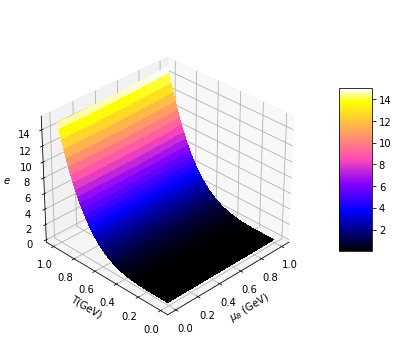

In [30]:
## not needed to be run
## takes time 25 mins

partial=Derivative(P,mub)
nb=partial.doit()
partial=Derivative(P,muq)
nq=partial.doit()
partial=Derivative(P,mus)
ns=partial.doit()
partial=Derivative(P,T)
sen=partial.doit()

en=T*sen-P+mub*nb+muq*nq+mus*ns
en=lambdify(((mub,muq,mus,T),), en, modules=libraries)

xn = np.linspace(0.0, 1.0, num=100, endpoint=True)
yn = np.linspace(0.01, 5.0, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
    m=[]
    for j in range(len(yn)):
        m.append(en((xn[i],0.,0.,yn[j])))
    p.append(m)
xn, yn = np.meshgrid(xn, yn)
#print(xn,yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel(r'$e$')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('eos_evsTvsmub.pdf')






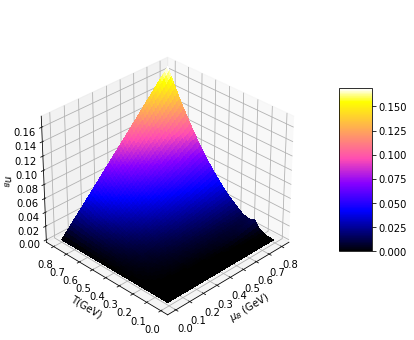

In [31]:
## not needed to be run
## takes time

partial=Derivative(P,mub)
nb=partial.doit()
nb=lambdify(((mub,muq,mus,T),), nb, modules=libraries)

xn = np.linspace(0.0, 0.80, num=100, endpoint=True)
yn = np.linspace(0.01, 0.80, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
    m=[]
    for j in range(len(yn)):
        m.append(nb((xn[i],0.,0.,yn[j])))
    p.append(m)
xn, yn = np.meshgrid(xn, yn)
#print(xn,yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel(r'$n_{B}$')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('eos_nbvsTvsmub.pdf')

In [11]:
partial=Derivative(P,mub)
nb=partial.doit()
partial=Derivative(P,muq)
nq=partial.doit()
partial=Derivative(P,mus)
ns=partial.doit()
partial=Derivative(P,T)
sen=partial.doit()

en=T*sen-P+mub*nb+muq*nq+mus*ns
en=lambdify(((mub,muq,mus,T),), en, modules=libraries)
nb=lambdify(((mub,muq,mus,T),), nb, modules=libraries)

xn = np.linspace(0.0, 1.0, num=100, endpoint=True)
yn = np.linspace(0.01, 2.0, num=100, endpoint=True)
file2 = open("myfile_eos.txt", "a")  # append mode 

for i in range(len(xn)):
    for j in range(len(yn)):
        print(xn[i],yn[j],en((xn[i],0.,0.,yn[j])),nb((xn[i],0.,0.,yn[j])),file=file2)
file2.close()

In [12]:
a=np.loadtxt('myfile_eos.txt')
a[:,0]
a[:,1]
a[:,2]

array([1.76788550e-12, 1.45718987e-07, 3.05826264e-06, ...,
       2.26830063e+02, 2.36302412e+02, 2.46068737e+02])

/Users/pingaldasgupta/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=3,3 nx,ny=8,8 m=10000 fp=93.186577 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


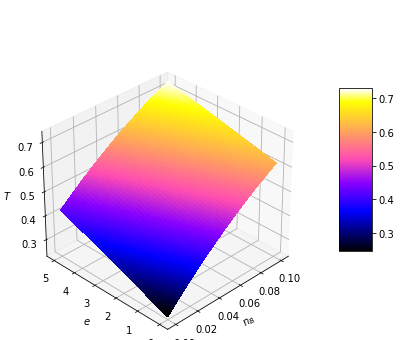

In [16]:
## interpolation part runs very slow on local jupyter notebook
## server calculates much faster 

import numpy as np
a=np.loadtxt('myfile_eos.txt')
xn=a[:,3]
yn=a[:,2]
zn=a[:,1]
finter = interpolate.interp2d(xn,yn,zn, kind='cubic')
xnew = np.linspace(0.0, 0.10, num=50, endpoint=True)
ynew = np.linspace(0.01, 5.0, num=50, endpoint=True)
p=[]
for i in range(len(xnew)):
    m=[]
    for j in range(len(ynew)):
        m.append(finter(xnew[i],ynew[j])[0])
    p.append(m)
xnew, ynew = np.meshgrid(xnew, ynew)

fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.set_ylabel('$e$')
ax.set_xlabel(r'$n_B$')
ax.set_zlabel(r'$T$')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
ax.view_init(azim=-135)
surf=ax.plot_surface(xnew, ynew, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('eos_Tvsevsn.pdf')

/Users/pingaldasgupta/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=3,3 nx,ny=8,8 m=10000 fp=268.695909 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


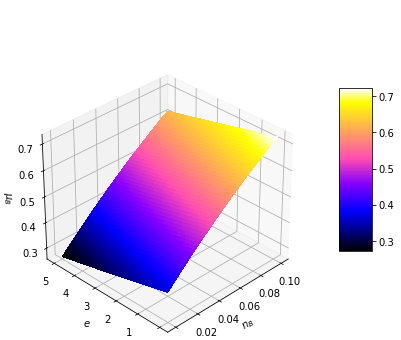

In [17]:
## interpolation part runs very slow on local jupyter notebook
## server calculates much faster 

a=np.loadtxt('myfile_eos.txt')
xn=a[:,3]
yn=a[:,2]
zn=a[:,0]
finter = interpolate.interp2d(xn,yn,zn, kind='cubic')
xnew = np.linspace(0.0, 0.10, num=50, endpoint=True)
ynew = np.linspace(0.01, 5.0, num=50, endpoint=True)
p=[]
for i in range(len(xnew)):
    m=[]
    for j in range(len(ynew)):
        m.append(finter(xnew[i],ynew[j])[0])
    p.append(m)
xnew, ynew = np.meshgrid(xnew, ynew)

fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.set_ylabel('$e$')
ax.set_xlabel(r'$n_B$')
ax.set_zlabel(r'$\mu_B$')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
ax.view_init(azim=-135)
surf=ax.plot_surface(xnew, ynew, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('eos_mubvsevsn.pdf')